In [1]:
import pandas as pd

# Load the dataset (adjust the file path if necessary)
file_path = '/work/Processed Data/CloudResearch-1_24.08-remove-etc-comma.csv'
data = pd.read_csv(file_path)

# Selecting relevant demographic columns for analysis
demographic_columns = [
    'Age','Sex', 'Relationship/Marital Status', 'Political Party', 'Ethnicity', 
    'Gender', 'Country Of Residence', 'Household Income', 'Race', 'Employment Status'
]

# Function to generate the summary of the demographic data
def generate_demographic_summary(data, demographic_columns):
    summary = {}
    for column in demographic_columns:
        # Get value counts in percentage
        counts = data[column].value_counts(normalize=True) * 100
        summary[column] = counts.round(2).to_dict()  # Convert to dictionary for easier reading
    return summary

# Generating the summary for demographic data
demographic_summary = generate_demographic_summary(data, demographic_columns)

# Displaying the summary
import pprint
pprint.pprint(demographic_summary)

{'Age': {18: 0.74,
         19: 0.74,
         20: 1.49,
         21: 2.48,
         22: 1.73,
         23: 3.22,
         24: 2.97,
         25: 2.48,
         26: 4.21,
         27: 4.46,
         28: 4.7,
         29: 5.2,
         30: 5.94,
         31: 4.7,
         32: 5.2,
         33: 4.46,
         34: 3.22,
         35: 3.22,
         36: 4.21,
         37: 2.97,
         38: 2.72,
         39: 2.97,
         40: 2.23,
         41: 1.24,
         42: 3.96,
         43: 1.73,
         44: 1.73,
         45: 1.49,
         46: 1.49,
         47: 1.73,
         48: 1.24,
         49: 1.24,
         50: 0.74,
         51: 0.25,
         52: 0.99,
         53: 0.99,
         54: 0.74,
         56: 0.99,
         58: 0.25,
         59: 0.5,
         61: 0.74,
         63: 0.25,
         64: 0.5,
         66: 0.25,
         72: 0.5,
         73: 0.25},
 'Country Of Residence': {'Australia': 0.25,
                          'Canada': 2.97,
                          'United Kingdom': 3

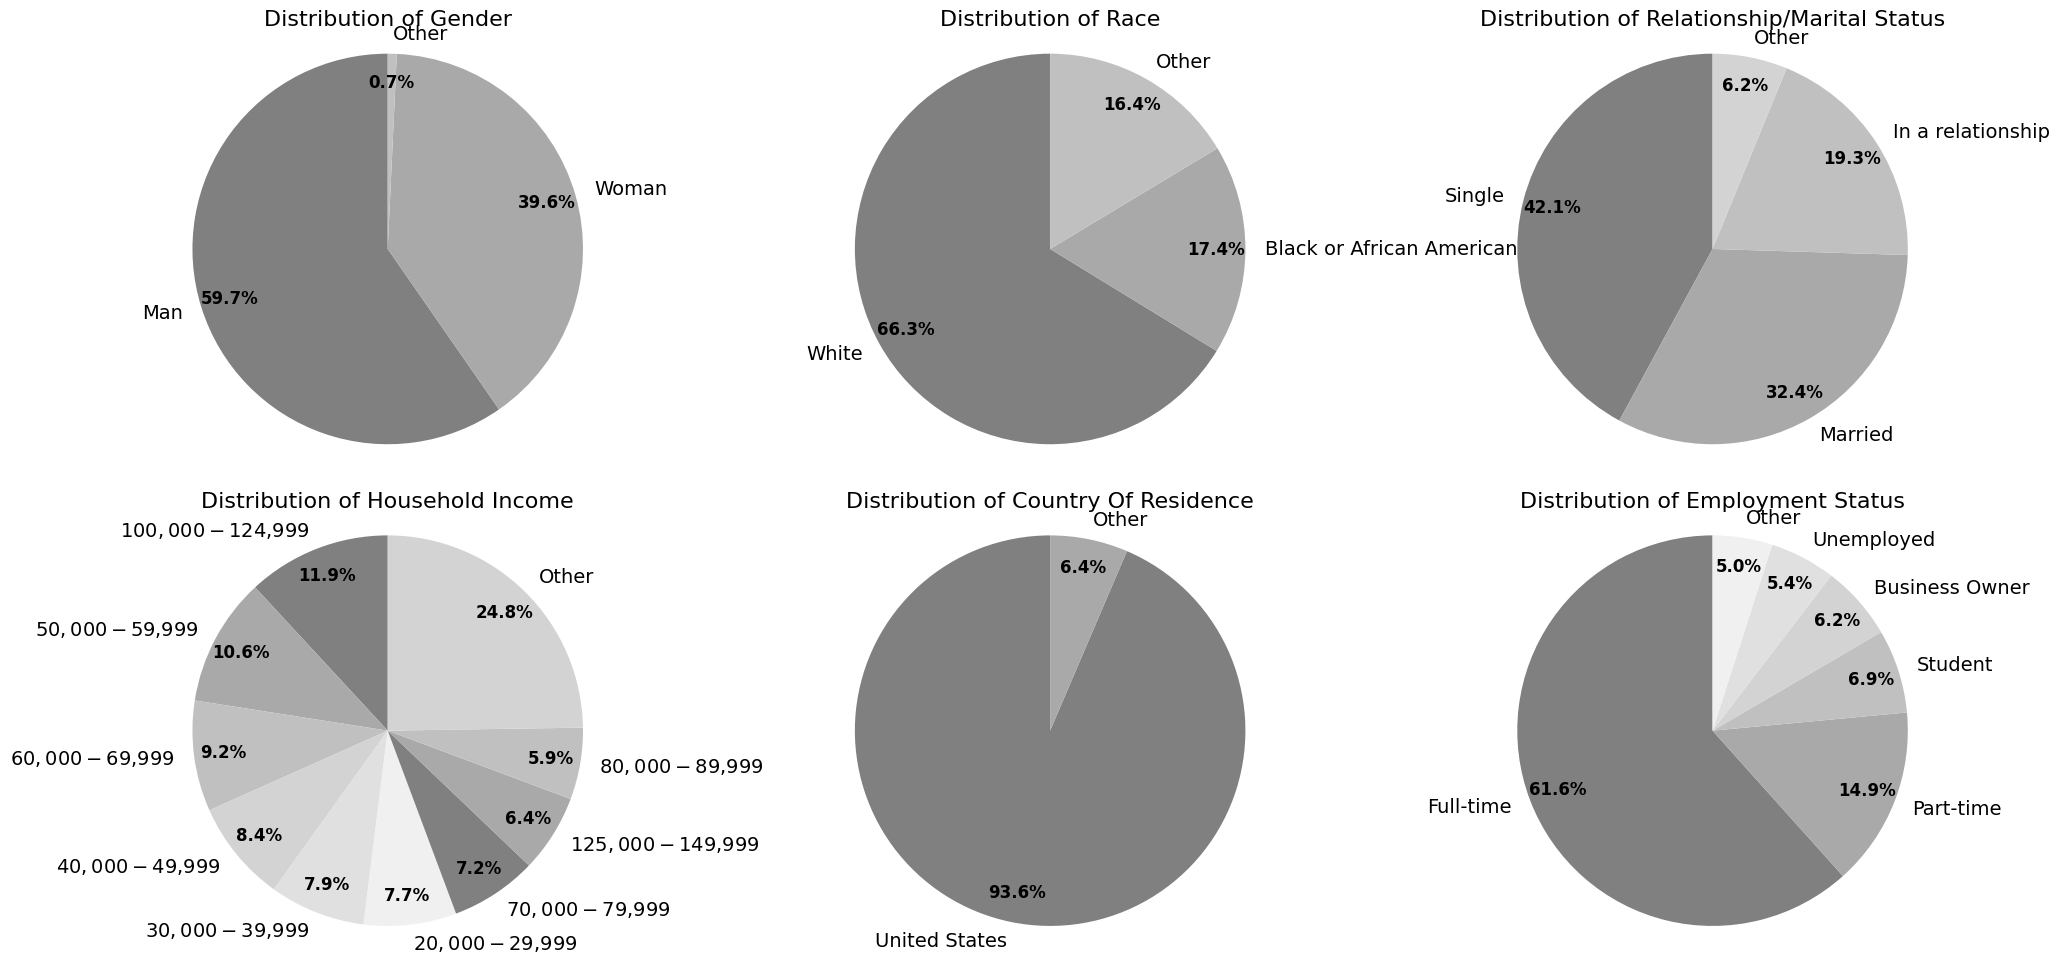

In [2]:
import matplotlib.pyplot as plt

# Selecting relevant demographic columns for analysis
demographic_columns = [
    'Gender', 'Race', 'Relationship/Marital Status', 'Household Income', 'Country Of Residence', 'Employment Status'
]

# Function to combine categories less than 5% into "Other"
def combine_small_categories(counts, threshold=5):
    total = counts.sum()
    counts_above_threshold = counts[counts / total * 100 >= threshold]
    counts_below_threshold = counts[counts / total * 100 < threshold].sum()
    if counts_below_threshold > 0:
        counts_above_threshold['Other'] = counts_below_threshold
    return counts_above_threshold

# Function to generate and display pie charts for demographic data
def plot_pie_charts(data, columns):
    fig, axs = plt.subplots(2, 3, figsize=(20,10))  # Increased figure size for better spacing
    axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration
    
    for i, column in enumerate(columns):
        counts = data[column].value_counts()  # Get the counts of each category
        counts = combine_small_categories(counts)  # Combine small categories as "Other"
        
        total = counts.sum()
        percentages = counts / total * 100
        labels = counts.index
        
        wedges, texts, autotexts = axs[i].pie(
            percentages, 
            labels=labels, 
            startangle=90, 
            colors=['#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3', '#E0E0E0', '#F0F0F0'],
            autopct='%1.1f%%',
            pctdistance=0.85,
            textprops={'fontsize': 14}  # Increased label font size
        )
        
        axs[i].set_title(f'Distribution of {column}', fontsize=16,)  # Larger title font size
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        
        # Adjust font size and position of percentage labels
        plt.setp(autotexts, size=12, weight="bold")  # Increased percentage text size
        
    plt.tight_layout(pad=2.0)  # Add padding to avoid overlapping of subplots
    plt.savefig("/work/Output Figures/demographic-graph.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Plotting pie charts for the selected demographic columns
plot_pie_charts(data, demographic_columns)

In [3]:
# Step 1: Select the relevant column (in this case, 'Which Chatbots')
chatbot_column = data['Which Chatbots'].dropna()

# Step 2: Calculate the distribution of chatbot usage without double-counting
# Split entries with multiple chatbots into separate mentions, and calculate the percentage for each chatbot
chatbot_usage_distribution = chatbot_column.str.get_dummies(sep=',').mean() * 100

# Step 3: Display the updated distribution of chatbot usage
print("Chatbot Usage Distribution (percentage of participants):")
print(chatbot_usage_distribution)

# Step 4: Calculate the proportion of unique participants who use any chatbot
unique_chatbot_users_count = chatbot_column.notna().sum()  # Total number of participants who selected at least one chatbot
total_participants = len(data)  # Total number of participants

# Proportion of participants who use any chatbot
chatbot_usage_percentage = (unique_chatbot_users_count / total_participants) * 100

print(f"\nProportion of participants using any chatbot: {chatbot_usage_percentage:.2f}%")

Chatbot Usage Distribution (percentage of participants):
Anima             6.683168
Character.ai     42.574257
Other            13.118812
Replika          31.683168
Snapchat MyAI    44.306931
Xiaoice           1.732673
dtype: float64

Proportion of participants using any chatbot: 100.00%


In [4]:
# Let's focus on analyzing the 'Chatbot Device' column in detail.

# Calculate the distribution of devices used for interacting with chatbots
device_distribution = data['Chatbot Device'].value_counts(normalize=True) * 100

# Display the result for 'Chatbot Device'
device_distribution

Computer,Smartphone           36.881188
Smartphone                    30.940594
Computer                      23.762376
Computer,Smartphone,Tablet     5.940594
Smartphone,Tablet              1.237624
Computer,Tablet                0.742574
Other                          0.247525
Tablet                         0.247525
Name: Chatbot Device, dtype: float64

In [5]:
# Separate the 'Use Interest' column by individual interests and count them
# First, we will split the combined responses into individual reasons and then count the occurrences

# Split entries with multiple interests, flatten the resulting list, and get unique interest counts
interest_split_counts = data['Use Interest'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the separated interest counts
interest_split_counts
# Sum of all occurrences (total interest mentions)
total_interest_mentions = interest_split_counts.sum()
interest_split_counts

Curious about AI/chatbots/the service                  26.220472
Wanted to have fun                                     22.362205
To use it for a creative purpose (creative writing     15.118110
 character development)                                15.118110
Feeling lonely                                         10.393701
To get better at being social and talking to people     6.141732
Seeking a relationship with a chatbot                   2.992126
Other                                                   1.653543
Name: Use Interest, dtype: float64

In [6]:
# Separate the 'Continued Use' column by individual reasons and count them
# Split the combined responses into individual reasons and count the occurrences

continued_use_split_counts = data['Continued Use'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the separated reason counts
continued_use_split_counts

For enjoyment/pleasure/fun                                     22.473605
To satisfy curiosity; to better understand the chatbot         19.834087
To pass time or escape from pressure/stress                    12.217195
For social interaction/companionship with the chatbot           9.351433
To not feel lonely                                              6.561086
For other emotional experiences                                 6.184012
To better understand self/identity                              5.806938
To better understand other people through using the chatbot     5.580694
To bolster self-confidence                                      5.128205
 self-esteem                                                    5.128205
Other                                                           1.734540
Name: Continued Use, dtype: float64

In [7]:
# Separate the 'Chatbot Topics' column by individual topics and count them
# Split the combined responses into individual topics and count the occurrences

topics_split_counts = data['Chatbot Topics'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the separated topic counts
topics_split_counts

Casual conversation                                                            21.000658
Entertainment and play                                                         17.314022
Venting/talking about personal issues regarding yourself (mental health        11.323239
 problems you are facing)                                                      11.323239
Talking about past events / reviewing events in a day                          10.072416
Talking about plans for the future                                              9.348255
Venting/talking about personal issues regarding others (interpersonal drama     8.755760
 negative feelings towards others)                                              8.755760
Other                                                                           2.106649
Name: Chatbot Topics, dtype: float64

In [8]:
# Analyze the 'Session Length' column to understand how long participants engage with chatbots

# Calculate the distribution of participants' responses for session length
session_length_distribution = data['Session Length'].value_counts(normalize=True) * 100

# Display the result for 'Session Length'
session_length_distribution

# Adjust the session length percentages to ensure each participant is counted once
# We will handle the multiple selections by splitting them and counting them as individual selections

session_length_split_counts = data['Session Length'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the adjusted session length percentages
session_length_split_counts

15-30 min      42.643923
<15 min        35.394456
30 min - 1h    15.138593
1h - 2h         4.904051
4h+             1.279318
2h - 4h         0.639659
Name: Session Length, dtype: float64

In [9]:
# Analyze the 'Chatbot Frequency' column to understand how often participants use chatbots

# Calculate the distribution of participants' responses for usage frequency
frequency_distribution = data['Chatbot Frequency'].value_counts(normalize=True) * 100

# Display the result for 'Chatbot Frequency'
frequency_distribution

# Adjust the frequency percentages by splitting combined selections and calculating the individual contributions

frequency_split_counts = data['Chatbot Frequency'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the adjusted usage frequency percentages
frequency_split_counts

A few times a week            42.250531
Around once a week            24.416136
Daily                         15.074310
A few times a month            8.917197
Once a month or less           3.397028
Varies from month to month     2.972399
Varies from week to week       2.760085
Other/prefer to specify        0.212314
Name: Chatbot Frequency, dtype: float64

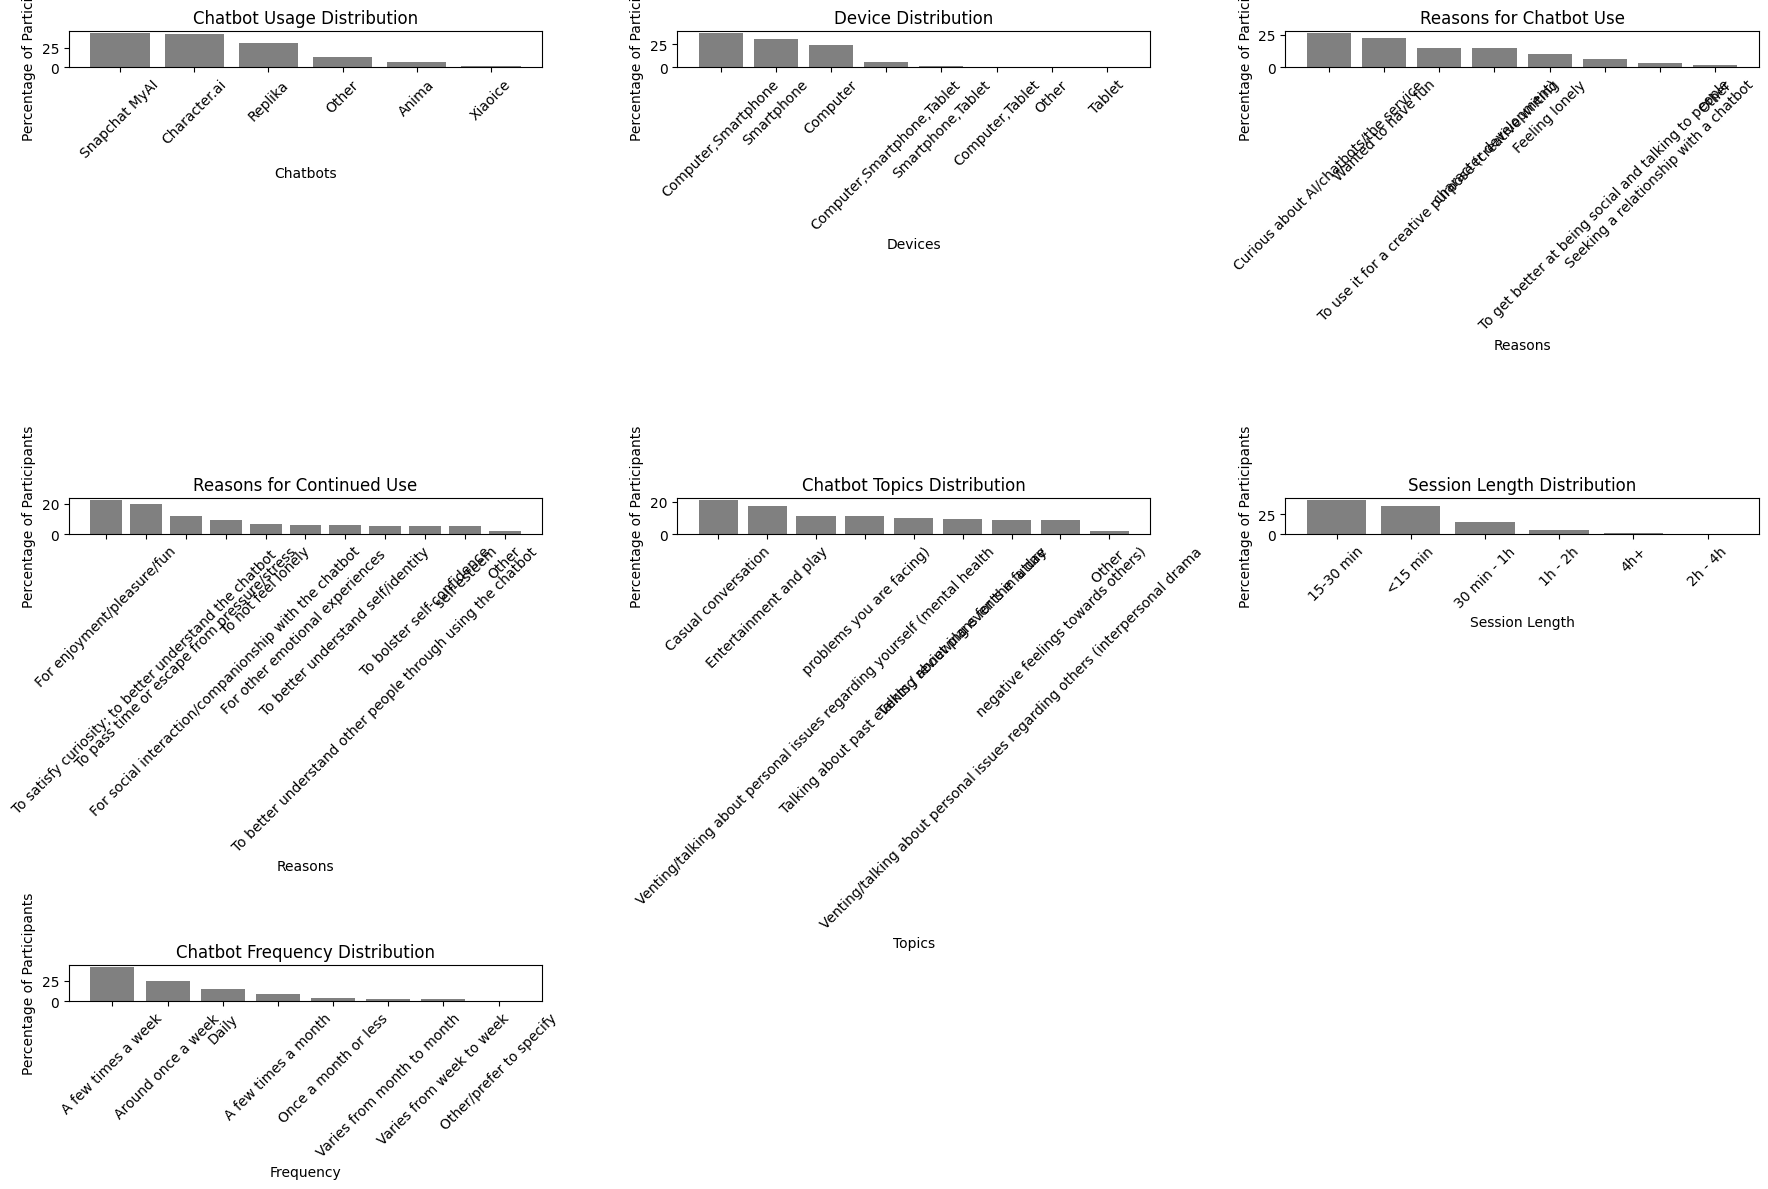

In [10]:
# Step 2: Create a figure with multiple subplots (3 rows, 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(18, 12))  # Adjust to fit all the bar charts
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Function to create bar charts within subplots, sorting data by descending order
def plot_bar_chart(ax, data, title, xlabel, ylabel, rotation=45):
    sorted_data = data.sort_values(ascending=False)  # Sort data from max to min
    ax.bar(sorted_data.index, sorted_data.values, color='gray')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=rotation, labelsize=10)

# Step 3: Plot the distributions on different subplots
plot_bar_chart(axs[0], chatbot_usage_distribution, 'Chatbot Usage Distribution', 'Chatbots', 'Percentage of Participants')
plot_bar_chart(axs[1], device_distribution, 'Device Distribution', 'Devices', 'Percentage of Participants')
plot_bar_chart(axs[2], interest_split_counts, 'Reasons for Chatbot Use', 'Reasons', 'Percentage of Participants')
plot_bar_chart(axs[3], continued_use_split_counts, 'Reasons for Continued Use', 'Reasons', 'Percentage of Participants')
plot_bar_chart(axs[4], topics_split_counts, 'Chatbot Topics Distribution', 'Topics', 'Percentage of Participants')
plot_bar_chart(axs[5], session_length_split_counts, 'Session Length Distribution', 'Session Length', 'Percentage of Participants')
plot_bar_chart(axs[6], frequency_split_counts, 'Chatbot Frequency Distribution', 'Frequency', 'Percentage of Participants')

# Turn off any unused subplots (since we have 7 plots and 9 subplot spaces)
for i in range(7, 9):
    fig.delaxes(axs[i])

# Step 4: Adjust the layout and display the figure
plt.tight_layout()
plt.show()

In [11]:
# Function to print the labels of a given dataset
def print_labels(data, label_name):
    print(f"\nLabels for {label_name}:")
    for label in data.index:
        print(f"- {label}")

# Print out all the labels for each distribution

print_labels(chatbot_usage_distribution, 'Chatbot Usage Distribution')
print_labels(device_distribution, 'Device Distribution')
print_labels(interest_split_counts, 'Reasons for Chatbot Use')
print_labels(continued_use_split_counts, 'Reasons for Continued Use')
print_labels(topics_split_counts, 'Chatbot Topics Distribution')
print_labels(session_length_split_counts, 'Session Length Distribution')
print_labels(frequency_split_counts, 'Chatbot Frequency Distribution')


Labels for Chatbot Usage Distribution:
- Anima
- Character.ai
- Other
- Replika
- Snapchat MyAI
- Xiaoice

Labels for Device Distribution:
- Computer,Smartphone
- Smartphone
- Computer
- Computer,Smartphone,Tablet
- Smartphone,Tablet
- Computer,Tablet
- Other
- Tablet

Labels for Reasons for Chatbot Use:
- Curious about AI/chatbots/the service
- Wanted to have fun
- To use it for a creative purpose (creative writing
-  character development)
- Feeling lonely
- To get better at being social and talking to people
- Seeking a relationship with a chatbot
- Other

Labels for Reasons for Continued Use:
- For enjoyment/pleasure/fun
- To satisfy curiosity; to better understand the chatbot 
- To pass time or escape from pressure/stress
- For social interaction/companionship with the chatbot
- To not feel lonely
- For other emotional experiences 
- To better understand self/identity
- To better understand other people through using the chatbot
- To bolster self-confidence
-  self-esteem
- Other

# Survey 3 demographics

In [12]:
# continuation
# demographics of remaining participants
file = "/work/Processed Data/CloudResearch-merged_24.11.11_processed.csv"
all_data = pd.read_csv(file)

data = all_data[all_data["Survey_Number"] == 3]
demographic_columns = [
    'Age','Sex', 'Relationship/Marital Status', 'Political Party', 'Ethnicity', 
    'Gender', 'Country Of Residence', 'Household Income', 'Race', 'Employment Status'
]


# Function to generate the summary of the demographic data
def generate_demographic_summary(data, demographic_columns):
    summary = {}
    for column in demographic_columns:
        # Get value counts in percentage
        counts = data[column].value_counts(normalize=True) * 100
        summary[column] = counts.round(2).to_dict()  # Convert to dictionary for easier reading
    return summary

# Generating the summary for demographic data
demographic_summary = generate_demographic_summary(data, demographic_columns)

# Displaying the summary
import pprint
pprint.pprint(demographic_summary)


{'Age': {18: 0.56,
         19: 0.28,
         20: 1.96,
         21: 0.84,
         22: 1.4,
         23: 1.12,
         24: 2.8,
         25: 3.36,
         26: 2.52,
         27: 3.36,
         28: 3.64,
         29: 2.52,
         30: 5.6,
         31: 3.92,
         32: 5.04,
         33: 4.48,
         34: 3.08,
         35: 3.08,
         36: 3.36,
         37: 2.8,
         38: 3.08,
         39: 4.48,
         40: 3.08,
         41: 2.24,
         42: 4.48,
         43: 1.68,
         44: 3.08,
         45: 1.4,
         46: 1.68,
         47: 0.84,
         48: 1.68,
         49: 1.96,
         50: 0.84,
         51: 0.84,
         52: 2.52,
         53: 1.4,
         54: 0.56,
         55: 1.12,
         56: 1.12,
         57: 0.56,
         58: 0.56,
         60: 0.56,
         61: 0.56,
         62: 0.28,
         63: 0.56,
         64: 0.56,
         65: 0.84,
         67: 0.28,
         69: 0.28,
         70: 0.28,
         72: 0.56,
         73: 0.28},
 'Country Of Resi

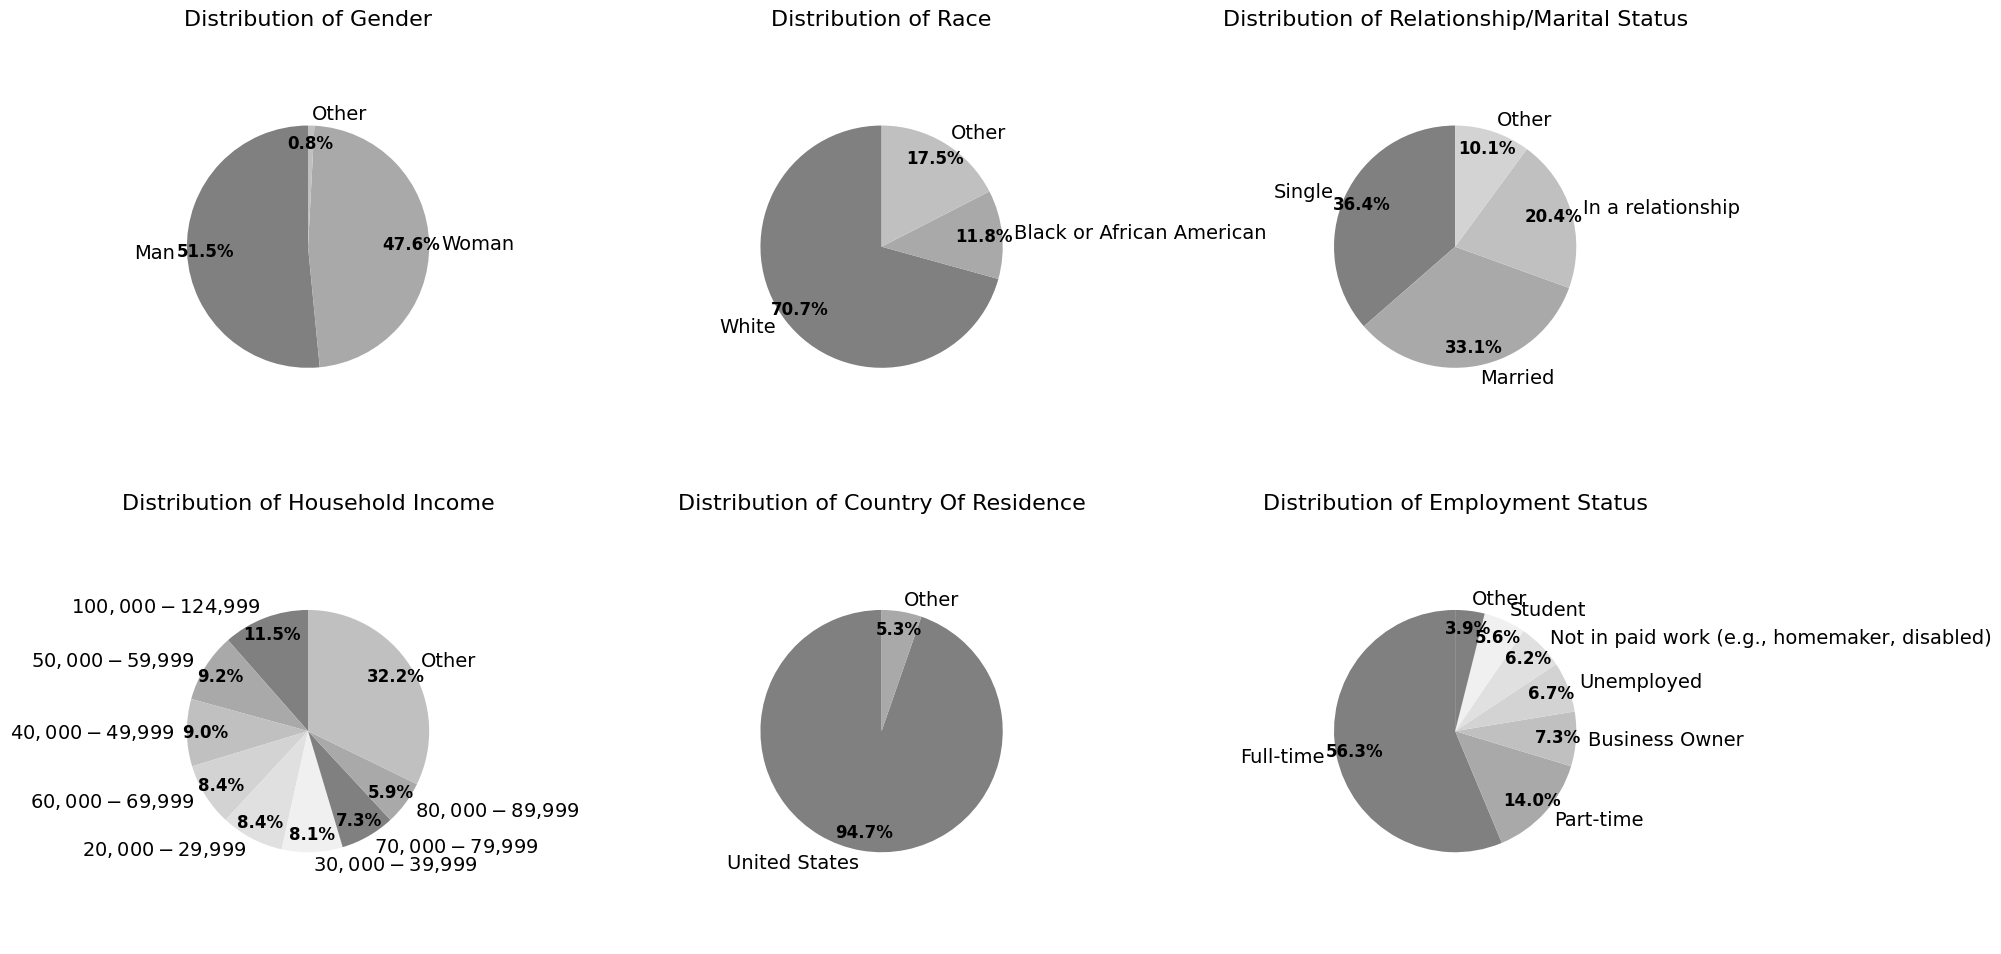

In [13]:
import matplotlib.pyplot as plt

# Selecting relevant demographic columns for analysis
demographic_columns = [
    'Gender', 'Race', 'Relationship/Marital Status', 'Household Income', 'Country Of Residence', 'Employment Status'
]

# Function to combine categories less than 5% into "Other"
def combine_small_categories(counts, threshold=5):
    total = counts.sum()
    counts_above_threshold = counts[counts / total * 100 >= threshold]
    counts_below_threshold = counts[counts / total * 100 < threshold].sum()
    if counts_below_threshold > 0:
        counts_above_threshold['Other'] = counts_below_threshold
    return counts_above_threshold

# Function to generate and display pie charts for demographic data
def plot_pie_charts(data, columns):
    fig, axs = plt.subplots(2, 3, figsize=(20,10))  # Increased figure size for better spacing
    axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration
    
    for i, column in enumerate(columns):
        counts = data[column].value_counts()  # Get the counts of each category
        counts = combine_small_categories(counts)  # Combine small categories as "Other"
        
        total = counts.sum()
        percentages = counts / total * 100
        labels = counts.index
        
        wedges, texts, autotexts = axs[i].pie(
            percentages, 
            labels=labels, 
            startangle=90, 
            colors=['#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3', '#E0E0E0', '#F0F0F0'],
            autopct='%1.1f%%',
            pctdistance=0.85,
            textprops={'fontsize': 14}  # Increased label font size
        )
        
        axs[i].set_title(f'Distribution of {column}', fontsize=16,)  # Larger title font size
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
        
        # Adjust font size and position of percentage labels
        plt.setp(autotexts, size=12, weight="bold")  # Increased percentage text size
        
    plt.tight_layout(pad=2.0)  # Add padding to avoid overlapping of subplots
    plt.savefig("/work/Output Figures/demographic-graph.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Plotting pie charts for the selected demographic columns
plot_pie_charts(data, demographic_columns)

In [14]:
# Step 1: Select the relevant column (in this case, 'Which Chatbots')
chatbot_column = data['Which Chatbots'].dropna()

# Step 2: Calculate the distribution of chatbot usage without double-counting
# Split entries with multiple chatbots into separate mentions, and calculate the percentage for each chatbot
chatbot_usage_distribution = chatbot_column.str.get_dummies(sep=',').mean() * 100

# Step 3: Display the updated distribution of chatbot usage
print("Chatbot Usage Distribution (percentage of participants):")
print(chatbot_usage_distribution)

# Step 4: Calculate the proportion of unique participants who use any chatbot
unique_chatbot_users_count = chatbot_column.notna().sum()  # Total number of participants who selected at least one chatbot
total_participants = len(data)  # Total number of participants

# Proportion of participants who use any chatbot
chatbot_usage_percentage = (unique_chatbot_users_count / total_participants) * 100

print(f"\nProportion of participants using any chatbot: {chatbot_usage_percentage:.2f}%")

Chatbot Usage Distribution (percentage of participants):
Anima             4.326923
Character.ai     46.153846
Other             9.615385
Pi                8.173077
Replika          32.692308
Snapchat MyAI    34.134615
Xiaoice           0.480769
dtype: float64

Proportion of participants using any chatbot: 58.26%


In [15]:
# Let's focus on analyzing the 'Chatbot Device' column in detail.

# Calculate the distribution of devices used for interacting with chatbots
device_distribution = data['Chatbot Device'].value_counts(normalize=True) * 100

# Display the result for 'Chatbot Device'
device_distribution

Smartphone                    35.096154
Computer,Smartphone           32.211538
Computer                      26.442308
Computer,Smartphone,Tablet     2.884615
Smartphone,Tablet              1.923077
Computer,Tablet                0.961538
Computer,Other                 0.480769
Name: Chatbot Device, dtype: float64

In [16]:
# Separate the 'Use Interest' column by individual interests and count them
# First, we will split the combined responses into individual reasons and then count the occurrences

# Split entries with multiple interests, flatten the resulting list, and get unique interest counts
interest_split_counts = data['Use Interest'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the separated interest counts
interest_split_counts
# Sum of all occurrences (total interest mentions)
total_interest_mentions = interest_split_counts.sum()
interest_split_counts

Curious about AI/chatbots/the service                  22.707424
Wanted to have fun                                     19.650655
To use it for a creative purpose (creative writing     13.537118
 character development                                 13.537118
 etc.)                                                 13.537118
Feeling lonely                                         10.043668
To get better at being social and talking to people     4.803493
Seeking a relationship with a chatbot                   1.746725
Other                                                   0.436681
Name: Use Interest, dtype: float64

In [17]:
# Analyze the 'Session Length' column to understand how long participants engage with chatbots

# Calculate the distribution of participants' responses for session length
session_length_distribution = data['Session Length'].value_counts(normalize=True) * 100

# Display the result for 'Session Length'
session_length_distribution

# Adjust the session length percentages to ensure each participant is counted once
# We will handle the multiple selections by splitting them and counting them as individual selections

session_length_split_counts = data['Session Length'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the adjusted session length percentages
session_length_split_counts

15-30 min      39.676113
<15 min        36.842105
30 min - 1h    16.599190
1h - 2h         5.668016
4h+             0.809717
2h - 4h         0.404858
Name: Session Length, dtype: float64

In [18]:
# Separate the 'Continued Use' column by individual reasons and count them
# Split the combined responses into individual reasons and count the occurrences

continued_use_split_counts = data['Continued Use'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the separated reason counts
continued_use_split_counts

For enjoyment/pleasure/fun                                     22.175732
To pass time or escape from pressure/stress                    13.389121
To satisfy curiosity; to better understand the chatbot         12.691771
For social interaction/companionship with the chatbot           9.483961
For other emotional experiences                                 6.834031
To better understand self/identity                              6.415621
To bolster self-confidence                                      5.857741
 self-esteem                                                    5.857741
 etc.                                                           5.857741
To not feel lonely                                              5.439331
To better understand other people through using the chatbot     4.463040
Other                                                           1.534170
Name: Continued Use, dtype: float64

In [19]:
# Separate the 'Chatbot Topics' column by individual topics and count them
# Split the combined responses into individual topics and count the occurrences

topics_split_counts = data['Chatbot Topics'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the separated topic counts
topics_split_counts

Casual conversation                                                            20.334928
Entertainment and play                                                         15.430622
Venting/talking about personal issues regarding yourself (mental health        10.645933
 problems you are facing)                                                      10.645933
Talking about past events / reviewing events in a day                           8.732057
Venting/talking about personal issues regarding others (interpersonal drama     8.612440
 negative feelings towards others                                               8.612440
 etc.)                                                                          8.612440
Talking about plans for the future                                              6.818182
Other                                                                           1.555024
Name: Chatbot Topics, dtype: float64

In [20]:
# Analyze the 'Chatbot Frequency' column to understand how often participants use chatbots

# Calculate the distribution of participants' responses for usage frequency
frequency_distribution = data['Chatbot Frequency'].value_counts(normalize=True) * 100

# Display the result for 'Chatbot Frequency'
frequency_distribution

# Adjust the frequency percentages by splitting combined selections and calculating the individual contributions

frequency_split_counts = data['Chatbot Frequency'].str.split(',').explode().value_counts(normalize=True) * 100

# Display the adjusted usage frequency percentages
frequency_split_counts

A few times a week      48.198198
Around once a week      27.477477
Daily                   12.162162
A few times a month     11.261261
Once a month or less     0.900901
Name: Chatbot Frequency, dtype: float64

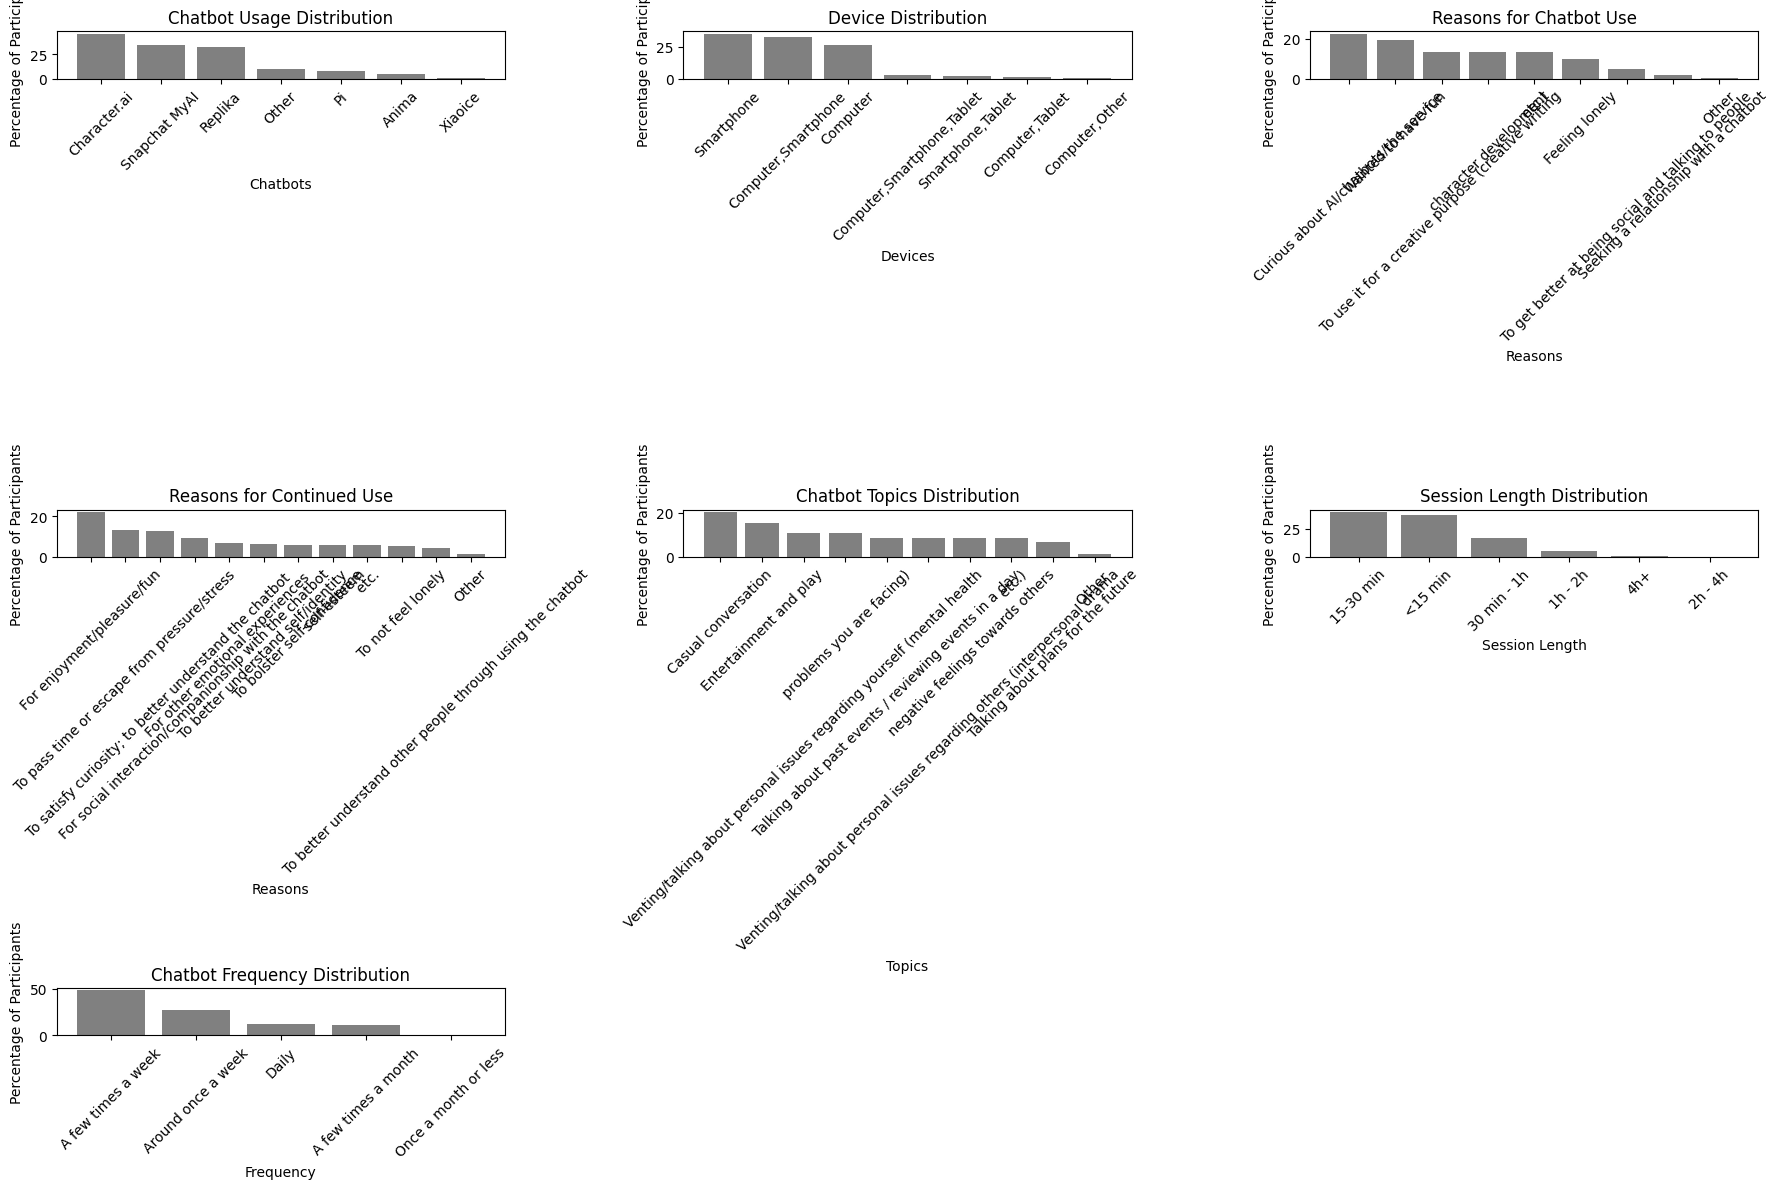

In [21]:
# Step 2: Create a figure with multiple subplots (3 rows, 3 columns)
fig, axs = plt.subplots(3, 3, figsize=(18, 12))  # Adjust to fit all the bar charts
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Function to create bar charts within subplots, sorting data by descending order
def plot_bar_chart(ax, data, title, xlabel, ylabel, rotation=45):
    sorted_data = data.sort_values(ascending=False)  # Sort data from max to min
    ax.bar(sorted_data.index, sorted_data.values, color='gray')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x', rotation=rotation, labelsize=10)

# Step 3: Plot the distributions on different subplots
plot_bar_chart(axs[0], chatbot_usage_distribution, 'Chatbot Usage Distribution', 'Chatbots', 'Percentage of Participants')
plot_bar_chart(axs[1], device_distribution, 'Device Distribution', 'Devices', 'Percentage of Participants')
plot_bar_chart(axs[2], interest_split_counts, 'Reasons for Chatbot Use', 'Reasons', 'Percentage of Participants')
plot_bar_chart(axs[3], continued_use_split_counts, 'Reasons for Continued Use', 'Reasons', 'Percentage of Participants')
plot_bar_chart(axs[4], topics_split_counts, 'Chatbot Topics Distribution', 'Topics', 'Percentage of Participants')
plot_bar_chart(axs[5], session_length_split_counts, 'Session Length Distribution', 'Session Length', 'Percentage of Participants')
plot_bar_chart(axs[6], frequency_split_counts, 'Chatbot Frequency Distribution', 'Frequency', 'Percentage of Participants')

# Turn off any unused subplots (since we have 7 plots and 9 subplot spaces)
for i in range(7, 9):
    fig.delaxes(axs[i])

# Step 4: Adjust the layout and display the figure
plt.tight_layout()
plt.show()

In [22]:
# Function to print the labels of a given dataset
def print_labels(data, label_name):
    print(f"\nLabels for {label_name}:")
    for label in data.index:
        print(f"- {label}")

# Print out all the labels for each distribution

print_labels(chatbot_usage_distribution, 'Chatbot Usage Distribution')
print_labels(device_distribution, 'Device Distribution')
print_labels(interest_split_counts, 'Reasons for Chatbot Use')
print_labels(continued_use_split_counts, 'Reasons for Continued Use')
print_labels(topics_split_counts, 'Chatbot Topics Distribution')
print_labels(session_length_split_counts, 'Session Length Distribution')
print_labels(frequency_split_counts, 'Chatbot Frequency Distribution')


Labels for Chatbot Usage Distribution:
- Anima
- Character.ai
- Other
- Pi
- Replika
- Snapchat MyAI
- Xiaoice

Labels for Device Distribution:
- Smartphone
- Computer,Smartphone
- Computer
- Computer,Smartphone,Tablet
- Smartphone,Tablet
- Computer,Tablet
- Computer,Other

Labels for Reasons for Chatbot Use:
- Curious about AI/chatbots/the service
- Wanted to have fun
- To use it for a creative purpose (creative writing
-  character development
-  etc.)
- Feeling lonely
- To get better at being social and talking to people
- Seeking a relationship with a chatbot
- Other

Labels for Reasons for Continued Use:
- For enjoyment/pleasure/fun
- To pass time or escape from pressure/stress
- To satisfy curiosity; to better understand the chatbot 
- For social interaction/companionship with the chatbot
- For other emotional experiences 
- To better understand self/identity
- To bolster self-confidence
-  self-esteem
-  etc.
- To not feel lonely
- To better understand other people through usin